In [1]:
import numpy as np
import torch
from deepmag import dataset, viz, model, train
from torchsummary import summary
from torch.functional import F

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

/opt/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
ds = dataset.from_dir("data/train")

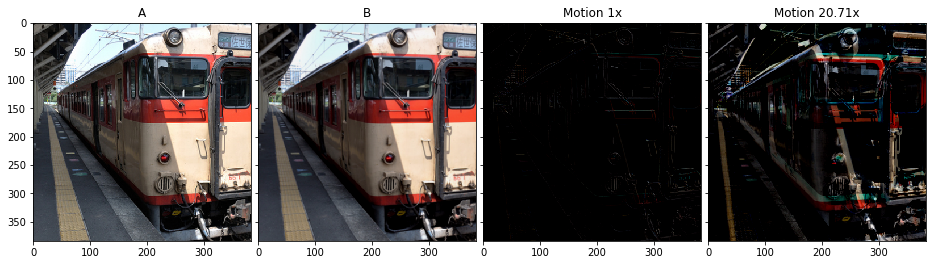

In [3]:
viz.show_sample(ds[27729]);

In [4]:
m = model.MagNet()
m = m.to(device)
# summary(m, input_size=[(3, 384, 384), (3, 384, 384), (1, 1, 1)], batch_size=4)

In [ ]:
train.train_epoch(m, ds, device, learning_rate=1e-4, batch_size=4, reg_weight=0.1)

Batch 1 loss: 0.51


In [ ]:
sample = ds[8000]
viz.show_sample(sample)

pred, _, _ = m.forward(
    torch.from_numpy(np.array(sample['frame_a'])).reshape(1, 3, 384, 384).to(device),
    torch.from_numpy(np.array(sample['frame_b'])).reshape(1, 3, 384, 384).to(device),
    torch.from_numpy(np.array(sample['amplification_f'])).reshape(1, 1).to(device))
viz.show_pred(sample['frame_a'],
          sample['frame_amplified'],
          sample['amplification_f'],
          pred.reshape(3, 384, 384).cpu())

In [ ]:
(device.type == 'cuda')